In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import os.path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import coo_matrix, hstack
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import math
import matplotlib.pyplot as plt

In [3]:
# Обучающая выборка
wer = pd.read_csv(r"D:\works\salary-train.csv")
wer['FullDescription'] = wer['FullDescription'].str.lower()
wer['FullDescription'] = wer['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)
wer['LocationNormalized'].fillna('nan', inplace=True)
wer['ContractTime'].fillna('nan', inplace=True)

#Тестовая выборка
test = pd.read_csv(r"D:\works\salary-test-mini.csv")
test['FullDescription'] = test['FullDescription'].str.lower()
test['FullDescription'] = test['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)
test['LocationNormalized'].fillna('nan', inplace=True)
test['ContractTime'].fillna('nan', inplace=True)

# Обучение
vectorizer = TfidfVectorizer(min_df = 5)
vectorizer1 = DictVectorizer()
X = vectorizer.fit_transform(wer['FullDescription'])
X_train = vectorizer1.fit_transform(wer[['LocationNormalized', 'ContractTime']].to_dict('records'))
X = hstack([X,X_train])

# Тест
Y = vectorizer.transform(test['FullDescription'])
Y_test = vectorizer1.transform(test[['LocationNormalized', 'ContractTime']].to_dict('records'))
Y = hstack([Y,Y_test])

# Обучение линейной регрессии
clf = Ridge(alpha=1.0,random_state=241)
clf.fit(X, wer['SalaryNormalized'])
s = clf.get_params()
clf.set_params(**s)
clf.predict(Y)

array([56555.61500155, 37188.32442618])

In [4]:
X

<60000x24627 sparse matrix of type '<class 'numpy.float64'>'
	with 8485759 stored elements in COOrdinate format>

In [5]:
Y

<2x24627 sparse matrix of type '<class 'numpy.float64'>'
	with 304 stored elements in COOrdinate format>

0.01
0.08
0.2
0.4
0.9
1
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2
4
7
10


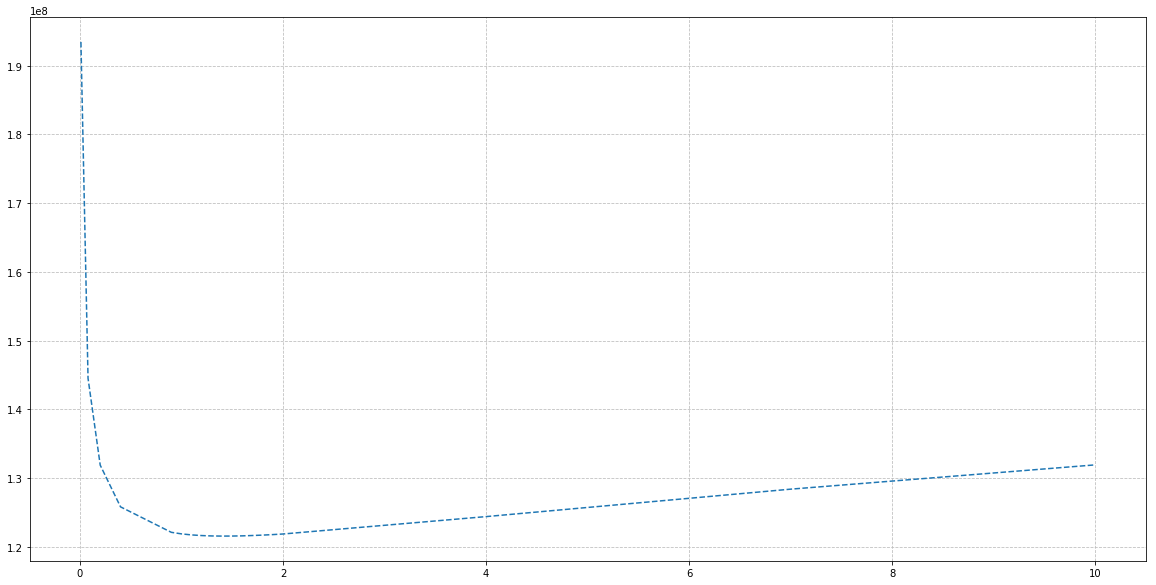

In [42]:
# Обучающая выборка
wer = pd.read_csv(r"D:\works\salary-train.csv")
wer['FullDescription'] = wer['FullDescription'].str.lower()
wer['FullDescription'] = wer['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)
wer['LocationNormalized'].fillna('nan', inplace=True)
wer['ContractTime'].fillna('nan', inplace=True)

#Тестовая выборка
test = pd.read_csv(r"D:\works\salary-test-mini.csv")
test['FullDescription'] = test['FullDescription'].str.lower()
test['FullDescription'] = test['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)
test['LocationNormalized'].fillna('nan', inplace=True)
test['ContractTime'].fillna('nan', inplace=True)

# Обучение
vectorizer = TfidfVectorizer(min_df = 5)
vectorizer1 = DictVectorizer()
X = vectorizer.fit_transform(wer['FullDescription'])
X_train = vectorizer1.fit_transform(wer[['LocationNormalized', 'ContractTime']].to_dict('records'))
X = hstack([X,X_train])

kf = KFold(n_splits=3, shuffle=True, random_state=1)
kf.split(X,wer['SalaryNormalized'])

# Обучение линейной регрессии
a = pd.DataFrame()
index = 0
for i in (0.01,0.08,0.2, 0.4,0.9, 1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9, 2, 4, 7, 10):
    clf = Ridge(alpha=i,random_state=241)
    b = cross_val_score(clf, X, wer['SalaryNormalized'], scoring = 'neg_mean_squared_error', cv = kf)
    a.loc[0, index] = math.fabs(b.mean())
    a.loc[1, index] = i
    index+=1
    print(i)
plt.figure(figsize = (20, 10))
plt.plot(a.loc[1,:],a.loc[0,:],'--')
plt.grid(True, linestyle='--', color='0.75')

In [41]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.445401e+08,1.746420e+08,1.258439e+08,1.221406e+08,1.219144e+08,1.217631e+08,1.216683e+08,1.216124e+08,1.215924e+08,1.215988e+08,1.216268e+08,1.216765e+08,1.217364e+08,1.218112e+08,1.218973e+08,1.244264e+08,1.284182e+08,1.319492e+08
1,8.000000e-02,2.000000e-02,4.000000e-01,9.000000e-01,1.000000e+00,1.100000e+00,1.200000e+00,1.300000e+00,1.400000e+00,1.500000e+00,1.600000e+00,1.700000e+00,1.800000e+00,1.900000e+00,2.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01
